# Vitesse du son dans les bandes acoustiques
#### Ce notebook est dédié au calcul des vitesses du son pour les trois branches acoustiques du KLaTe2, le long de trois directions spécifiques de sa zone de Brillouin.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone

In [28]:
# Chargement des données
API_KEY = "71t7m37H7F5Jw2PfGOrlKxgH4ZbRQh3W" 
MP_ID = "mp-11739" 

In [29]:
# Récupération des données de phonons
with MPRester(API_KEY) as m:
    phonon_bs = m.get_phonon_bandstructure_by_material_id(MP_ID)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Zone de Brillouin

In [38]:
plot_brillouin_zone(phonon_bs.structure)

## Tracé de la structure de bandes phononiques

In [31]:
fig_ph_bs = get_plot_bs(phonon_bs)
fig_ph_bs.update_yaxes(rangemode="tozero")
fig_ph_bs.show()

## Mise en évidence de 3 branches acoustiques 
Le code extrait les données de la structure de bandes phononiques du matériau et trace spécifiquement les trois branches acoustiques, qui correspondent aux modes de vibration de plus basse fréquence.

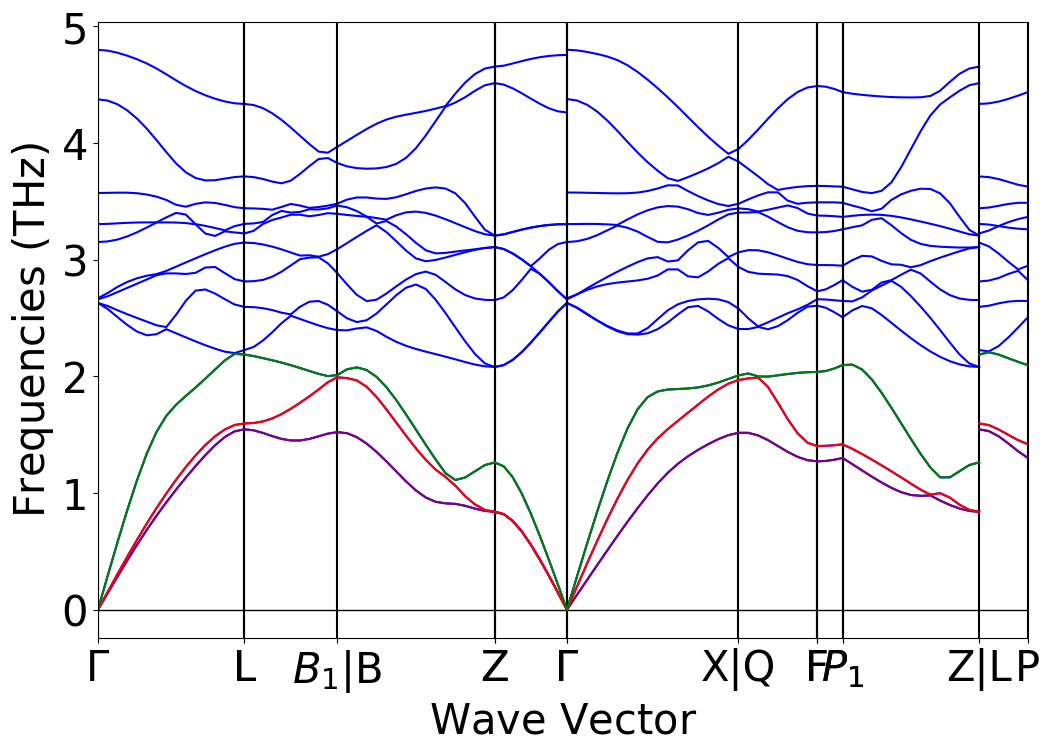

In [32]:
phonon_bandstructure = PhononBSPlotter(phonon_bs)
data_ph = phonon_bandstructure.bs_plot_data()
distances = data_ph['distances']
frequency = data_ph['frequency']

phonon_bandstructure_plot = phonon_bandstructure.get_plot()

# Affichage de 3 branches acoustiques différentes.
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'purple')
    plt.plot(distances[i], frequency[i][1], color = 'red')
    plt.plot(distances[i], frequency[i][2], color = 'green')

## Calcul de la vitesse du son

Dans un cristal, les phonons représentent les quanta des vibrations du réseau cristallin et sont décrits par des relations de dispersion reliant leur fréquence **f** au vecteur d'onde **k**. La vitesse du son dans le matériau peut être déterminée en analysant la pente de ces courbes de dispersion pour les branches acoustiques.

**Formule de la Vitesse du Son :**

La vitesse du son **v** est donnée par la relation :

$$
v = 2\pi \left| \frac{df}{dk} \right|
$$

où :

$\frac{df}{dk}$ représente la dérivée de la fréquence par rapport au vecteur d'onde, c'est-à-dire la pente de la courbe de dispersion phononique.Une pente plus raide correspond à une vitesse du son plus élevée.


In [33]:
# Fréquences dans trois directions différentes

f1 = frequency[0] # Fréquences de la 1e direction (chemin Γ - L = indice 0)
f2 = frequency[3] # Fréquences de la 2e direction (chemin Z - Γ = indice 3)
f3 = frequency[4] # Fréquences de la 3e direction (chemin Γ - X = indice 4)

A = 10**(-10) # Conversion en Angström
f = 10**12    # Conversion en THz

In [34]:
def v_son(chosenBand):
    """
    Calcule et affiche la vitesse du son pour la bande acoustique sélectionnée dans trois directions spécifiques
    de la zone de Brillouin, puis trace les courbes de dispersion phononique correspondantes avec les pentes
    représentatives des vitesses calculées.

    Paramètre :
    chosenBand (int) : Indice de la bande acoustique choisie (0 pour la première, 1 pour la deuxième, etc.).
    
    """
    
    # Définition des couleurs pour chaque bande acoustique
    colors = ['purple', 'red', 'green']
    color = colors[chosenBand]
    
    # Calcul des variations de fréquence (Δf) pour chaque direction
    df1 = f1[chosenBand][1] - f1[chosenBand][0] # début de zone
    df2 = f2[chosenBand][-2] - f2[chosenBand][-1] # fin de zone
    df3 = f3[chosenBand][1] - f3[chosenBand][0]

    # Calcul des variations de distance (Δx) correspondantes
    dx1 = distances[0][1] - distances[0][0]
    dx2 = distances[3][-2] - distances[3][-1] # fin de zone
    dx3 = distances[4][1] - distances[4][0]

    # Calcul des vitesses du son (v = 2π * Δf * f/ Δx * A)
    v1 = 2*np.pi*(df1*f)/(dx1)*A
    v2 = np.abs(2*np.pi*(df2*f)/(dx2)*A) # pente négative -> valeur absolue 
    v3 = 2*np.pi*(df3*f)/(dx3)*A

    # Affichage des résultats
    print("La vitesse du son le long de la direction Γ - L vaut", v1, "[m/s]")
    print("La vitesse du son le long de la direction Z - Γ vaut", v2, "[m/s]")
    print("La vitesse du son le long de la direction Γ - X vaut", v3, "[m/s]")

    # Tracé des courbes de dispersion phononique
    phonon_bandstructure.get_plot()

    for i in range(len(distances)):
        plt.plot(distances[i], frequency[i][chosenBand], color)
    
    # Tracé des pentes représentant les vitesses du son calculées
    plt.plot([distances[0][0], distances[0][-1]], [0,v1/(A*2*np.pi*f)*(distances[0][-1]-distances[0][0])], '--', color=color,linewidth=5)
    plt.plot([distances[3][-1], distances[3][0]], [0,v2/(A*2*np.pi*f)*(distances[3][-1]-distances[3][0])], '--', color=color,linewidth=5)
    plt.plot([distances[4][0], distances[4][-1]], [0,v3/(A*2*np.pi*f)*(distances[4][-1]-distances[4][0])], '--', color=color,linewidth=5)
    plt.show()

### Première branche accoustique 
(= indice 0 dans chacune des directions)

La vitesse du son le long de la direction Γ - L vaut 1690.2860935111485 [m/s]
La vitesse du son le long de la direction Z - Γ vaut 1903.9205344782697 [m/s]
La vitesse du son le long de la direction Γ - X vaut 1470.4182742634011 [m/s]


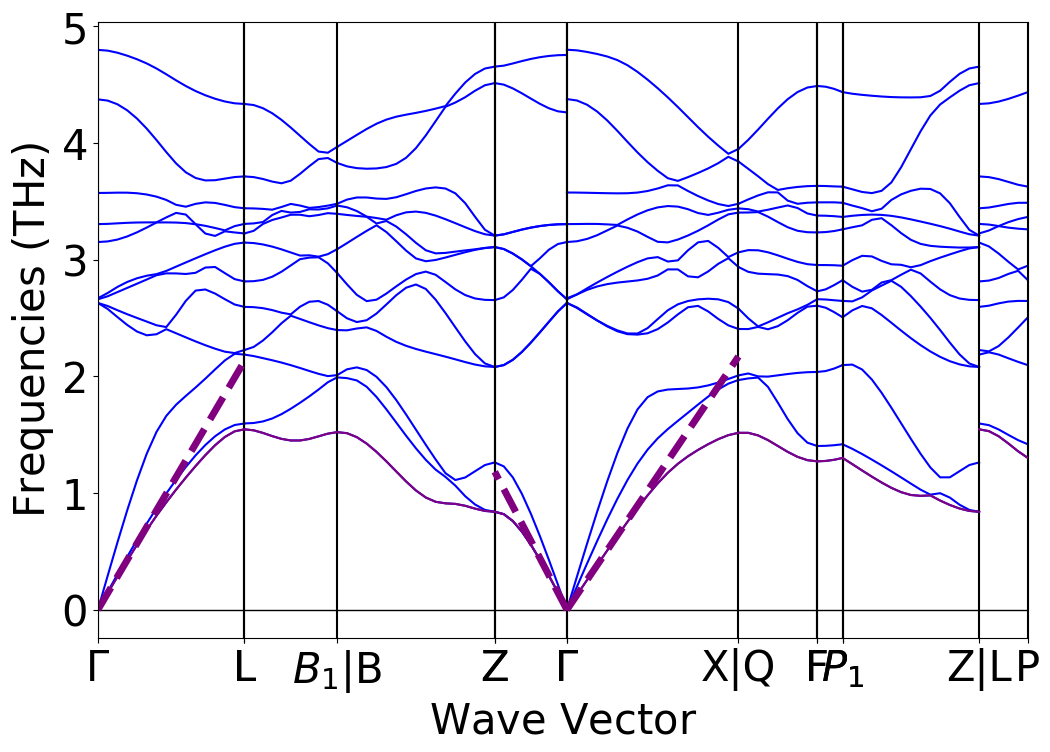

In [35]:
v_son(0)

### Deuxième branche accoustique 
(= indice 1 dans chacune des directions)

La vitesse du son le long de la direction Γ - L vaut 1815.2753038639048 [m/s]
La vitesse du son le long de la direction Z - Γ vaut 1903.9205344854834 [m/s]
La vitesse du son le long de la direction Γ - X vaut 2296.2208462933445 [m/s]


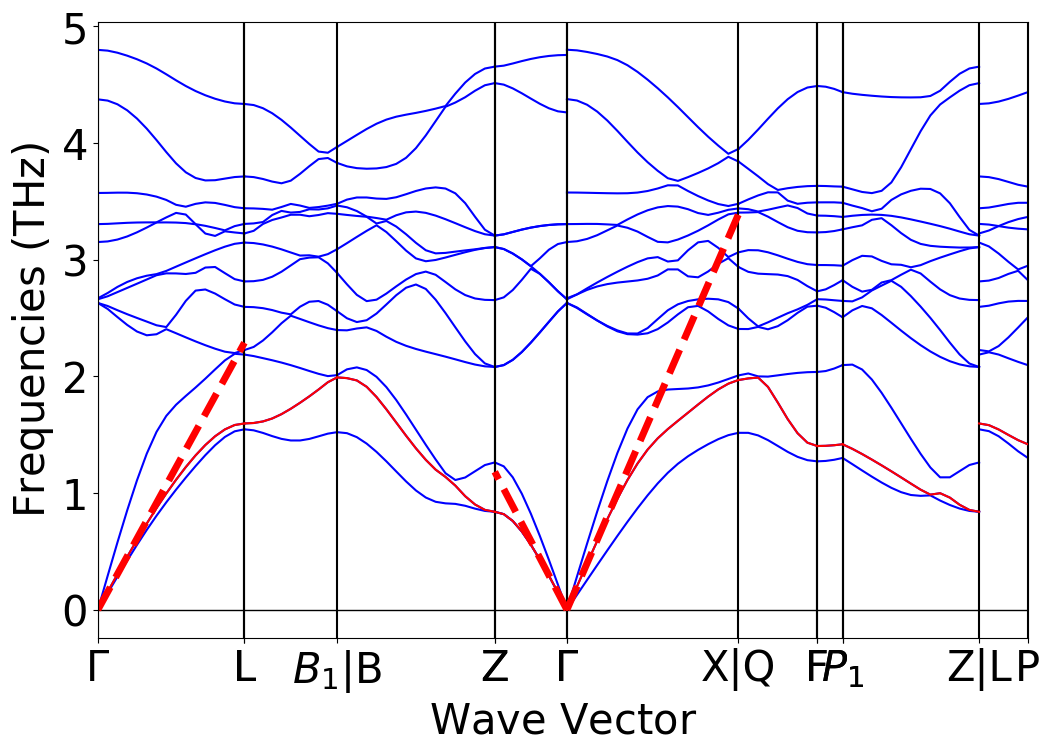

In [36]:
v_son(1)

### Troisième branche accoustique 
(= indice 2 dans chacune des directions)


La vitesse du son le long de la direction Γ - L vaut 3460.6106828100096 [m/s]
La vitesse du son le long de la direction Z - Γ vaut 2780.8324582923497 [m/s]
La vitesse du son le long de la direction Γ - X vaut 3286.5916498786014 [m/s]


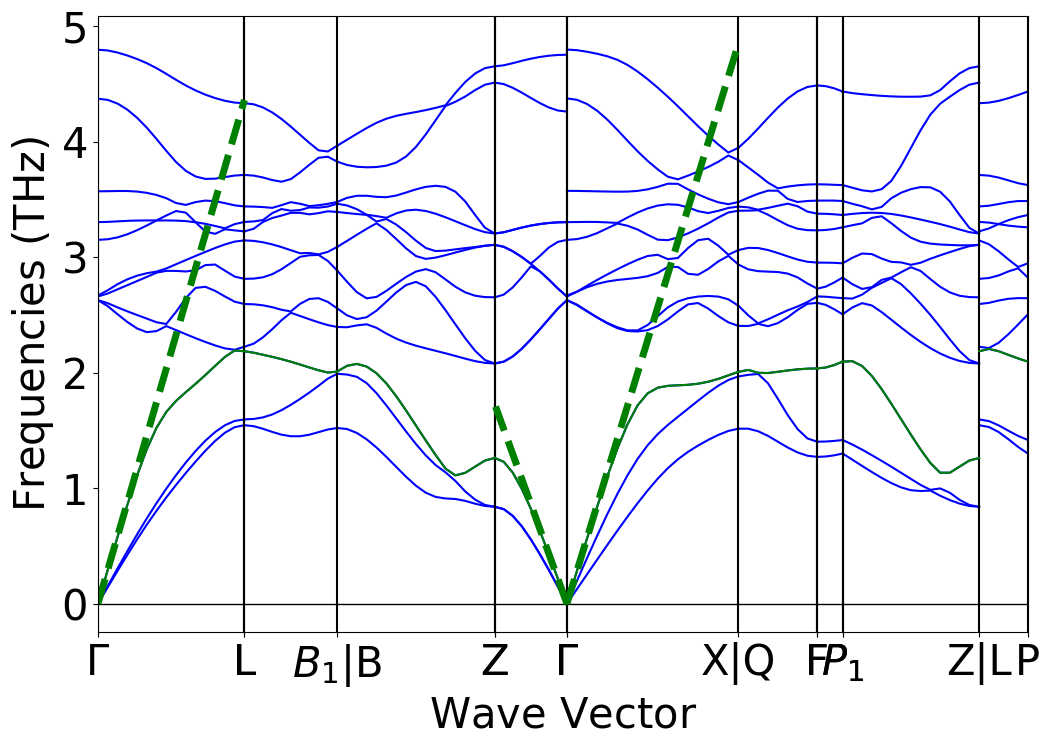

In [37]:
v_son(2)